<a href="https://colab.research.google.com/github/afaale/ML/blob/ML/CNN_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

cifar10 dataset with 10 classes. Code is mainly taken from 
https://www.kaggle.com/code/kedarsai/cifar-10-88-accuracy-using-keras/notebook


In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
(train_X, train_y), (test_X, test_y) = datasets.cifar10.load_data()
train_X, test_X = train_X / 255.0, test_X / 255.0

170498071/170498071 [==============================] - 16s 0us/step


In [12]:
#One-hot encode
train_y_cat = tf.keras.utils.to_categorical(train_y, 10)
test_y_cat = tf.keras.utils.to_categorical(test_y, 10)


# Model 1

In [4]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
train_X[0].shape

(32, 32, 3)

In [ ]:
plt.figure(figsize = (10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xlabel(labels[train_y[i][0]])
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_X[i])


In [12]:
model = models.Sequential()

model.add(layers.Conv2D(filters=32, kernel_size=(3,3), input_shape=(32,32,3), activation='relu'))
model.add(layers.MaxPooling2D())

model.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPooling2D())

model.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))

In [13]:
model.add(layers.Flatten())
model.add(layers.Dense(units=64, activation='relu'))
model.add(layers.Dense(units=10, activation='softmax'))

In [ ]:
model.summary()

In [14]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_X, train_y_cat, epochs=10, validation_data=(test_X, test_y_cat))

Epoch 1/10
1563/1563 [==============================] - 85s 53ms/step - loss: 1.5046 - accuracy: 0.4525 - val_loss: 1.2812 - val_accuracy: 0.5319
Epoch 2/10
1563/1563 [==============================] - 84s 54ms/step - loss: 1.1276 - accuracy: 0.5997 - val_loss: 1.1491 - val_accuracy: 0.5849
Epoch 3/10
1563/1563 [==============================] - 84s 54ms/step - loss: 0.9775 - accuracy: 0.6565 - val_loss: 0.9807 - val_accuracy: 0.6608
Epoch 4/10
1563/1563 [==============================] - 98s 63ms/step - loss: 0.8836 - accuracy: 0.6900 - val_loss: 0.9084 - val_accuracy: 0.6846
Epoch 5/10
1563/1563 [==============================] - 89s 57ms/step - loss: 0.8104 - accuracy: 0.7167 - val_loss: 0.8702 - val_accuracy: 0.6973
Epoch 6/10
1563/1563 [==============================] - 96s 62ms/step - loss: 0.7536 - accuracy: 0.7340 - val_loss: 0.8363 - val_accuracy: 0.7116
Epoch 7/10
1563/1563 [==============================] - 102s 65ms/step - loss: 0.6995 - accuracy: 0.7551 - val_loss: 0.8490 

<Axes: >

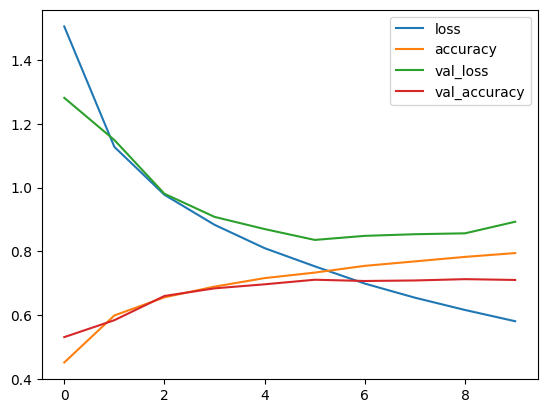

In [16]:
pd.DataFrame(history.history).plot()

In [18]:
test_loss, test_accuracy = model.evaluate(test_X, test_y_cat, verbose=2)
print(f'Test accuracy: {test_accuracy:.3f}')

313/313 - 5s - loss: 0.8932 - accuracy: 0.7109 - 5s/epoch - 16ms/step
Test accuracy: 0.711


In [14]:
model.save('cifar10.keras')

# Load trained model

In [15]:
new_model = tf.keras.models.load_model('cifar10.keras')

In [16]:
test_loss, test_accuracy = new_model.evaluate(test_X, test_y, verbose=2)
print(f'Test accuracy: {test_accuracy:.3f}')

313/313 - 4s - loss: 0.9292 - accuracy: 0.7195 - 4s/epoch - 13ms/step
Test accuracy: 0.720


# Model 2. Add dropout. Try tanh. Increase kernel size?

In [24]:
model2 = tf.keras.models.Sequential()
model2.add(layers.Conv2D(filters=32, kernel_size = (4,4), input_shape=(32,32,3), activation='tanh'))
model2.add(layers.MaxPool2D())
model2.add(layers.Dropout(0.25))

model2.add(layers.Conv2D(filters=32, kernel_size=(4,4), activation='tanh'))
model2.add(layers.MaxPool2D())
model2.add(layers.Dropout(0.25))

model2.add(layers.Flatten())
model2.add(layers.Dense(256, activation='tanh'))
model2.add(layers.Dense(10, activation='softmax'))
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
model2.summary()

In [27]:
history2 = model2.fit(train_X, train_y_cat,epochs=10, validation_data=(test_X, test_y_cat))

Epoch 1/10
1563/1563 [==============================] - 107s 68ms/step - loss: 1.5610 - accuracy: 0.4448 - val_loss: 1.3334 - val_accuracy: 0.5238
Epoch 2/10
1563/1563 [==============================] - 113s 73ms/step - loss: 1.3262 - accuracy: 0.5302 - val_loss: 1.2153 - val_accuracy: 0.5757
Epoch 3/10
1563/1563 [==============================] - 90s 57ms/step - loss: 1.2182 - accuracy: 0.5702 - val_loss: 1.1056 - val_accuracy: 0.6115
Epoch 4/10
1563/1563 [==============================] - 91s 58ms/step - loss: 1.1287 - accuracy: 0.6038 - val_loss: 1.0974 - val_accuracy: 0.6140
Epoch 5/10
1563/1563 [==============================] - 88s 56ms/step - loss: 1.0571 - accuracy: 0.6303 - val_loss: 1.0736 - val_accuracy: 0.6287
Epoch 6/10
1563/1563 [==============================] - 88s 56ms/step - loss: 0.9950 - accuracy: 0.6535 - val_loss: 1.0848 - val_accuracy: 0.6303
Epoch 7/10
1563/1563 [==============================] - 99s 63ms/step - loss: 0.9532 - accuracy: 0.6682 - val_loss: 1.0132

In [28]:
eval=model2.evaluate(test_X,test_y_cat)

313/313 [==============================] - 5s 17ms/step - loss: 0.9789 - accuracy: 0.6712


<Axes: >

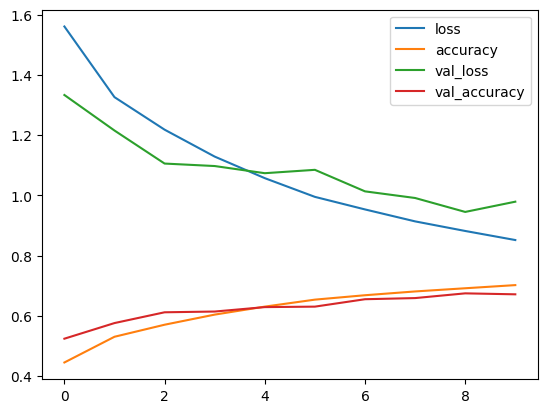

In [29]:
pd.DataFrame(history2.history).plot()

Conclusion: validation loss increases sharply in the end, although maybe it would have gone done again with more epochs. Either way, I will stick with reLU, since according to this article https://machinelearningmastery.com/choose-an-activation-function-for-deep-learning/
tanh is most often used for Recurrent Neural Networks. See this guide:
https://machinelearningmastery.com/an-introduction-to-recurrent-neural-networks-and-the-math-that-powers-them/

# Model 3. More layers. More filters. Back to relu. Back to (3,3) kernel. Change from 10 to 20 epochs. To avoid overfitting from more epochs, increase dropout to 40%.

In [35]:
model3 = models.Sequential()
model3.add(layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', input_shape = (32,32,3)))
model3.add(layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model3.add(layers.MaxPool2D())
model3.add(layers.Dropout(0.4))


model3.add(layers.Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
model3.add(layers.Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
model3.add(layers.MaxPool2D())
model3.add(layers.Dropout(0.4))

model3.add(layers.Flatten())
model3.add(layers.Dense(units = 1024, activation = 'relu'))
model3.add(layers.Dense(units = 1024, activation = 'relu'))

model3.add(layers.Dense(units = 10, activation = 'softmax'))
model3.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [36]:
history3 = model3.fit(train_X, train_y_cat, epochs=20, validation_data=(test_X, test_y_cat))

Epoch 1/20
1563/1563 [==============================] - 686s 438ms/step - loss: 1.5963 - accuracy: 0.4105 - val_loss: 1.2817 - val_accuracy: 0.5362
Epoch 2/20
1563/1563 [==============================] - 677s 433ms/step - loss: 1.2221 - accuracy: 0.5630 - val_loss: 1.0751 - val_accuracy: 0.6144
Epoch 3/20
1563/1563 [==============================] - 672s 430ms/step - loss: 1.0561 - accuracy: 0.6242 - val_loss: 0.9328 - val_accuracy: 0.6700
Epoch 4/20
1563/1563 [==============================] - 671s 430ms/step - loss: 0.9390 - accuracy: 0.6667 - val_loss: 0.8318 - val_accuracy: 0.7024
Epoch 5/20
1563/1563 [==============================] - 678s 434ms/step - loss: 0.8616 - accuracy: 0.6969 - val_loss: 0.8313 - val_accuracy: 0.7059
Epoch 6/20
1563/1563 [==============================] - 675s 432ms/step - loss: 0.7981 - accuracy: 0.7175 - val_loss: 0.8035 - val_accuracy: 0.7175
Epoch 7/20
1563/1563 [==============================] - 676s 432ms/step - loss: 0.7524 - accuracy: 0.7335 - val_

<Axes: >

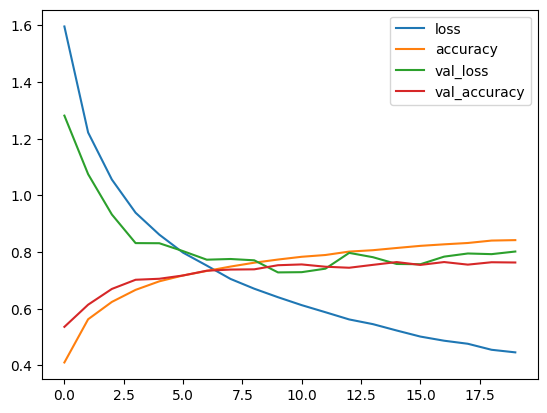

In [37]:
pd.DataFrame(history3.history).plot()

In [39]:
model.evaluate(test_X, test_y_cat)

313/313 [==============================] - 5s 14ms/step - loss: 0.8881 - accuracy: 0.7178


[0.8881216049194336, 0.7178000211715698]

In [40]:
model3.save('cifar10_model3')

In [41]:
!zip -r /content/cifar_10_3.zip /content/cifar10_model3


  adding: content/cifar10_model3/ (stored 0%)
  adding: content/cifar10_model3/assets/ (stored 0%)
  adding: content/cifar10_model3/fingerprint.pb (stored 0%)
  adding: content/cifar10_model3/keras_metadata.pb (deflated 92%)
  adding: content/cifar10_model3/saved_model.pb (deflated 89%)
  adding: content/cifar10_model3/variables/ (stored 0%)
  adding: content/cifar10_model3/variables/variables.index (deflated 66%)
  adding: content/cifar10_model3/variables/variables.data-00000-of-00001 (deflated 6%)


# Model 4. Add kernel initializer, 'he_uniform'. Add batch normalization for weights after the convolution layers. Add variable filter numbers as per google image classification guide:
https://developers.google.com/machine-learning/practica/image-classification/exercise-1


he uniform article:
https://arxiv.org/pdf/1502.01852.pdf

In [13]:
model4 = models.Sequential()
model4.add(layers.Conv2D(filters = 32, kernel_size = (3,3), kernel_initializer='he_uniform', activation = 'relu', input_shape = (32,32,3)))
model4.add(layers.BatchNormalization())
model4.add(layers.Conv2D(filters = 64, kernel_size = (3,3), kernel_initializer='he_uniform', activation = 'relu'))
model4.add(layers.BatchNormalization())
model4.add(layers.MaxPool2D())
model4.add(layers.Dropout(0.4))


model4.add(layers.Conv2D(filters = 128, kernel_size = (3,3), kernel_initializer='he_uniform', activation = 'relu'))
model4.add(layers.BatchNormalization())
model4.add(layers.Conv2D(filters = 256, kernel_size = (3,3), kernel_initializer='he_uniform', activation = 'relu'))
model4.add(layers.BatchNormalization())
model4.add(layers.MaxPool2D())
model4.add(layers.Dropout(0.5))

model4.add(layers.Conv2D(filters = 512, kernel_size = (3,3), kernel_initializer='he_uniform', activation = 'relu'))
model4.add(layers.BatchNormalization())
model4.add(layers.Conv2D(filters = 1024, kernel_size = (3,3), kernel_initializer='he_uniform', activation = 'relu'))

model4.add(layers.Flatten())
model4.add(layers.Dense(units = 1024, kernel_initializer='he_uniform', activation = 'relu'))
model4.add(layers.Dense(units = 1024, kernel_initializer='he_uniform', activation = 'relu'))
model4.add(layers.BatchNormalization())

model4.add(layers.Dense(units = 10, activation = 'softmax'))
model4.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [14]:
history4 = model4.fit(train_X, train_y_cat, epochs=100, validation_data=(test_X, test_y_cat))

Epoch 1/100
1563/1563 [==============================] - 37s 14ms/step - loss: 1.4475 - accuracy: 0.4884 - val_loss: 1.1120 - val_accuracy: 0.6215
Epoch 2/100
1563/1563 [==============================] - 21s 13ms/step - loss: 1.0099 - accuracy: 0.6496 - val_loss: 0.8360 - val_accuracy: 0.7191
Epoch 3/100
1563/1563 [==============================] - 21s 13ms/step - loss: 0.8306 - accuracy: 0.7149 - val_loss: 0.7694 - val_accuracy: 0.7413
Epoch 4/100
1563/1563 [==============================] - 22s 14ms/step - loss: 0.7133 - accuracy: 0.7569 - val_loss: 0.6903 - val_accuracy: 0.7719
Epoch 5/100
1563/1563 [==============================] - 22s 14ms/step - loss: 0.6263 - accuracy: 0.7869 - val_loss: 0.6433 - val_accuracy: 0.7924
Epoch 6/100
1563/1563 [==============================] - 21s 13ms/step - loss: 0.5476 - accuracy: 0.8145 - val_loss: 0.6305 - val_accuracy: 0.7938
Epoch 7/100
1563/1563 [==============================] - 21s 14ms/step - loss: 0.4843 - accuracy: 0.8348 - val_loss: 0

In [15]:
model4.evaluate(test_X, test_y_cat)

313/313 [==============================] - 2s 6ms/step - loss: 1.1148 - accuracy: 0.8303


[1.1148046255111694, 0.830299973487854]

<Axes: >

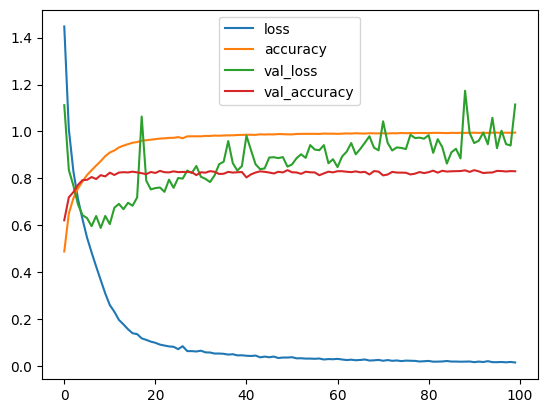

In [16]:
pd.DataFrame(history4.history).plot()

In [10]:
model4.save('model_4.keras')